In [19]:
import os
import h5py
import numpy as np 

In [20]:
from scipy.special import erf 

In [21]:
import corner as DFM
import matplotlib.pyplot as plt

In [22]:
dat_dir = '/scratch/gpfs/chhahn/21cmlfi/'

In [5]:
f = h5py.File(os.path.join(dat_dir, '21cmlfi.hdf5'), 'r')

thetas = f['theta'][...]
Del2 = f['Del2_21_nonoise'][...]
f.close()

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.23099e+05, 7.06000e+02, 1.29000e+02, 3.90000e+01, 1.90000e+01,
        1.30000e+01, 9.00000e+00, 9.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

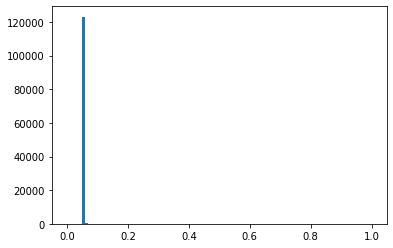

In [28]:
plt.hist(Del2[:,1], range=(0, 1), bins=100)

In [7]:
lbl_params = np.array([r"$\log_{10} f_{*,10}$",
                       r"$\alpha_*$",
                       r"$\log_{10} f_{\rm esc, 10}$",
                       r"$\alpha_{\rm esc}$",
                       r"$\log_{10}[M_{\rm turn}/{\rm M}_{\odot}]$",
                       r"$t_*$",
                       r"$\log_{10}\frac{L_{\rm X<2keV}/{\rm SFR}}{{\rm erg\ s^{-1}\ M_{\odot}^{-1}\ yr}}$",
                       r"$E_0/{\rm keV}$",
                       r"$\alpha_{\rm X}$"])

prior_params = [[-3,0], [-0.5,1], [-3,0],[-1,0.5], [8,10], [0.01,1], [38,42], [0.1,1.5], [-1,3]]

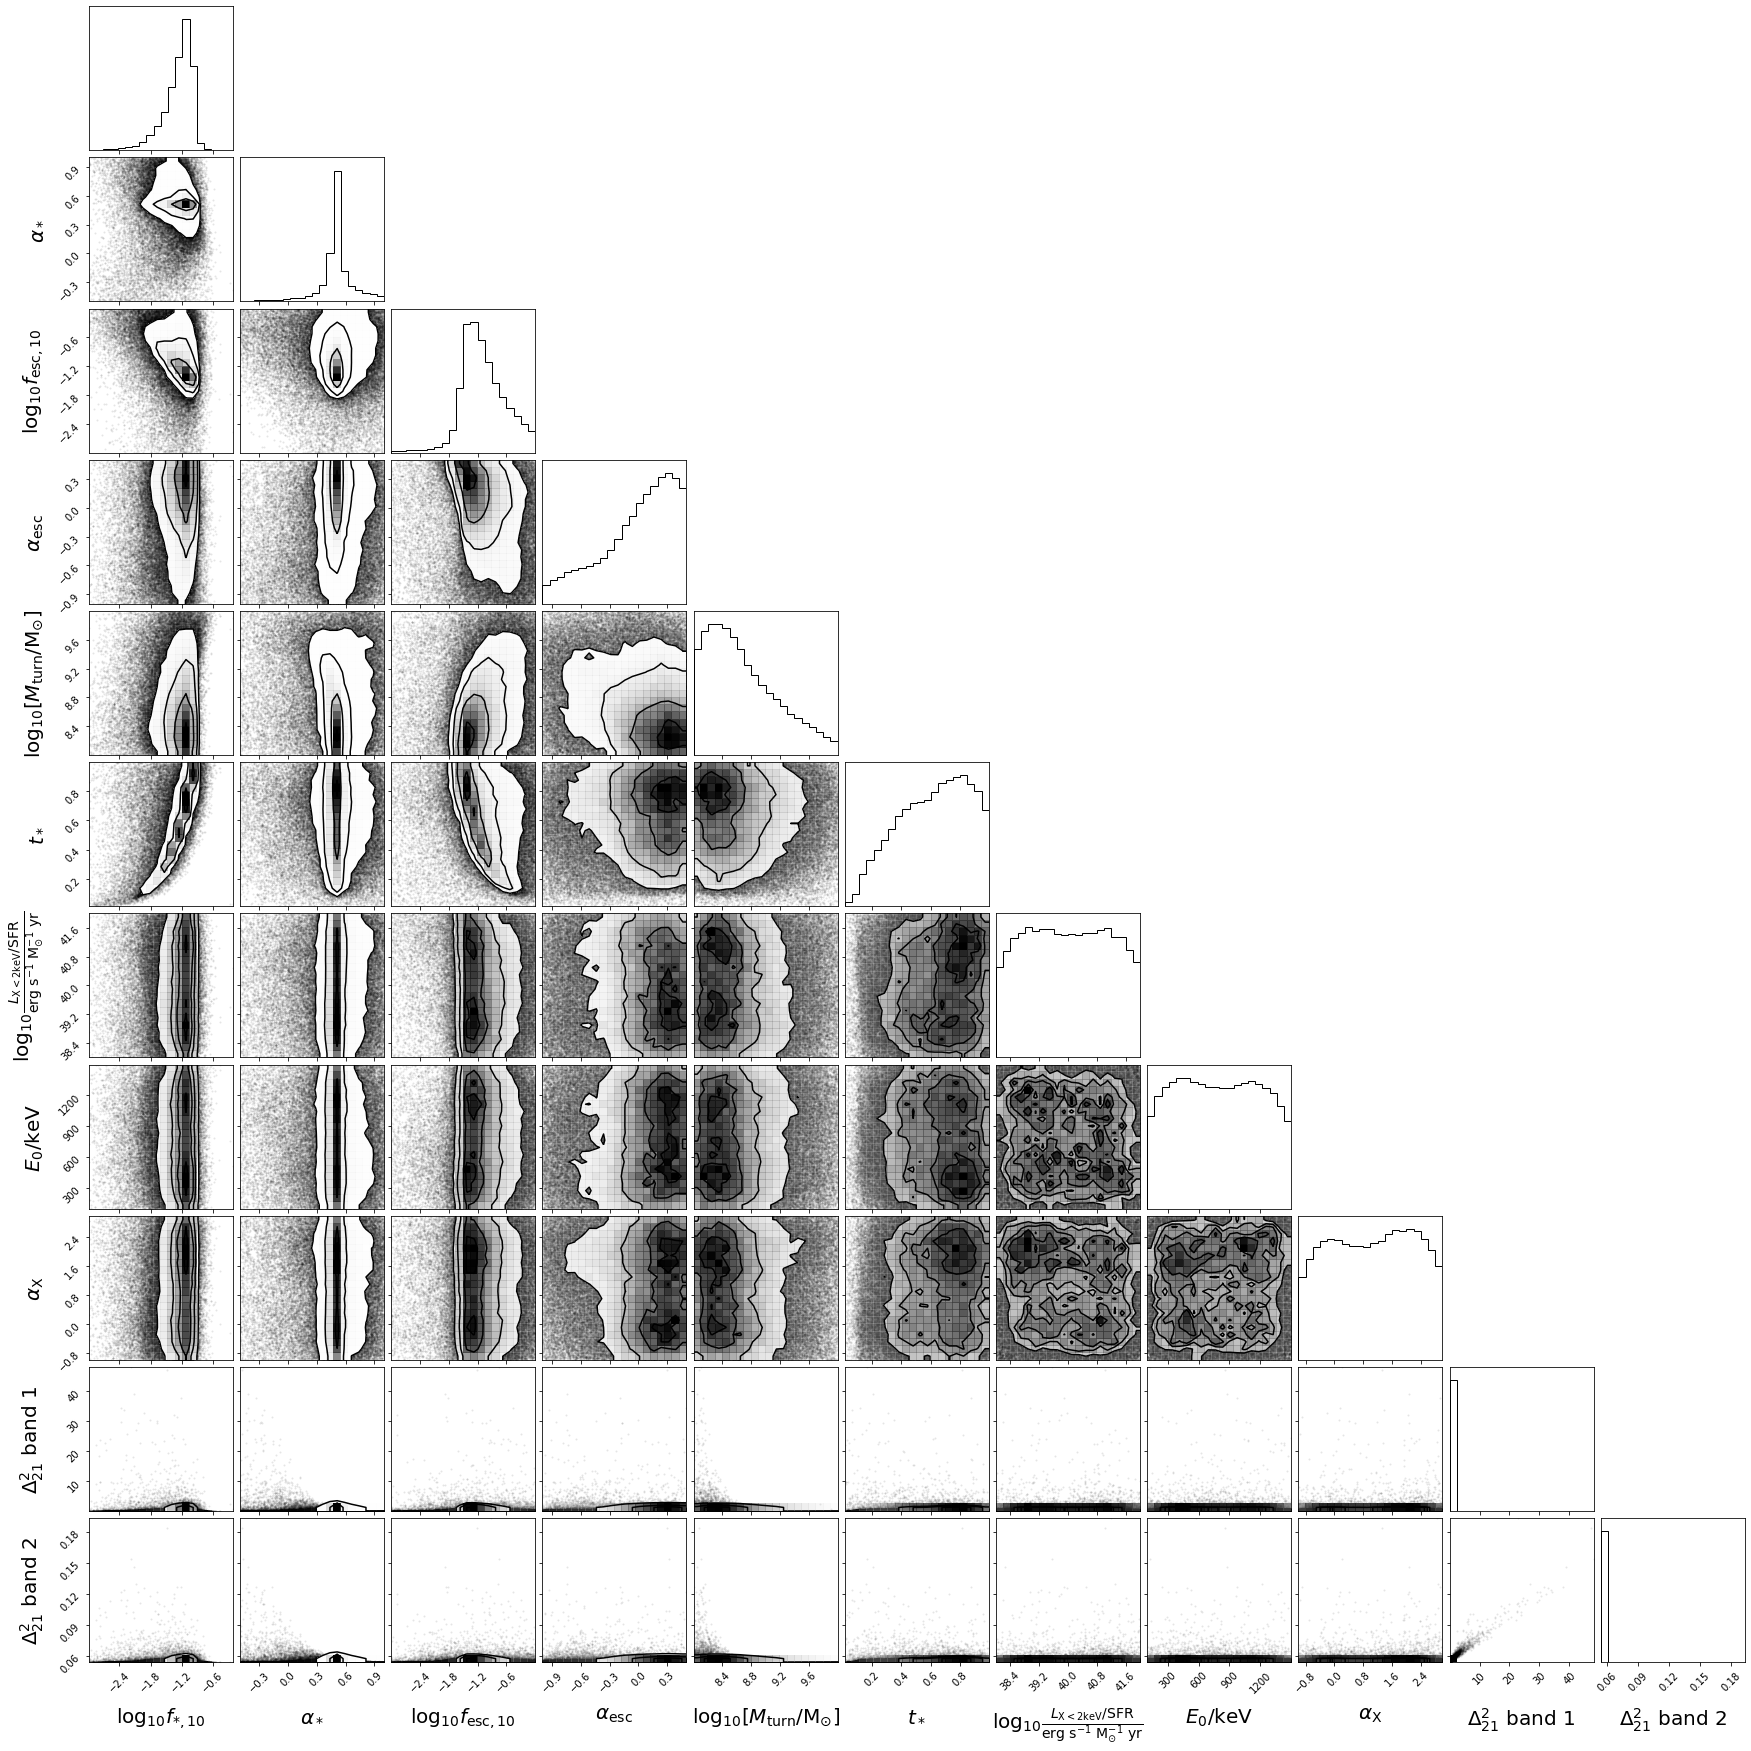

In [8]:
fig = DFM.corner(np.concatenate([thetas, Del2], axis=1), 
                 labels=list(lbl_params) + [r'$\Delta_{21}^2$ band 1', 
                                      r'$\Delta_{21}^2$ band 2'], 
                 label_kwargs={'fontsize': 20})

# apply noise model

$$\delta x \sim \frac{1}{2} (1 + {\rm erf} \frac{\delta x}{\sqrt{2} \sigma})$$

In [9]:
def noise_model(sigma, size=1): 
    
    dxs = []
    for i in range(size): 
        u = 1. 
        pdx = 0.
        while pdx < u:
            dx = np.random.uniform(-5*sigma, 5*sigma)
            u = np.random.uniform()
            pdx = 0.5 * (1 + erf(dx/np.sqrt(2)/sigma)) 
        dxs.append(dx)
    return np.array(dxs)

In [10]:
sigma_band1 = 3600
sigma_band2 = 300

dxs_band1 = noise_model(sigma_band1, size=Del2.shape[0])
dxs_band2 = noise_model(sigma_band2, size=Del2.shape[0])

In [13]:
Del2_noisy = Del2 + np.concatenate([dxs_band1[:,None], dxs_band2[:,None]], axis=1)

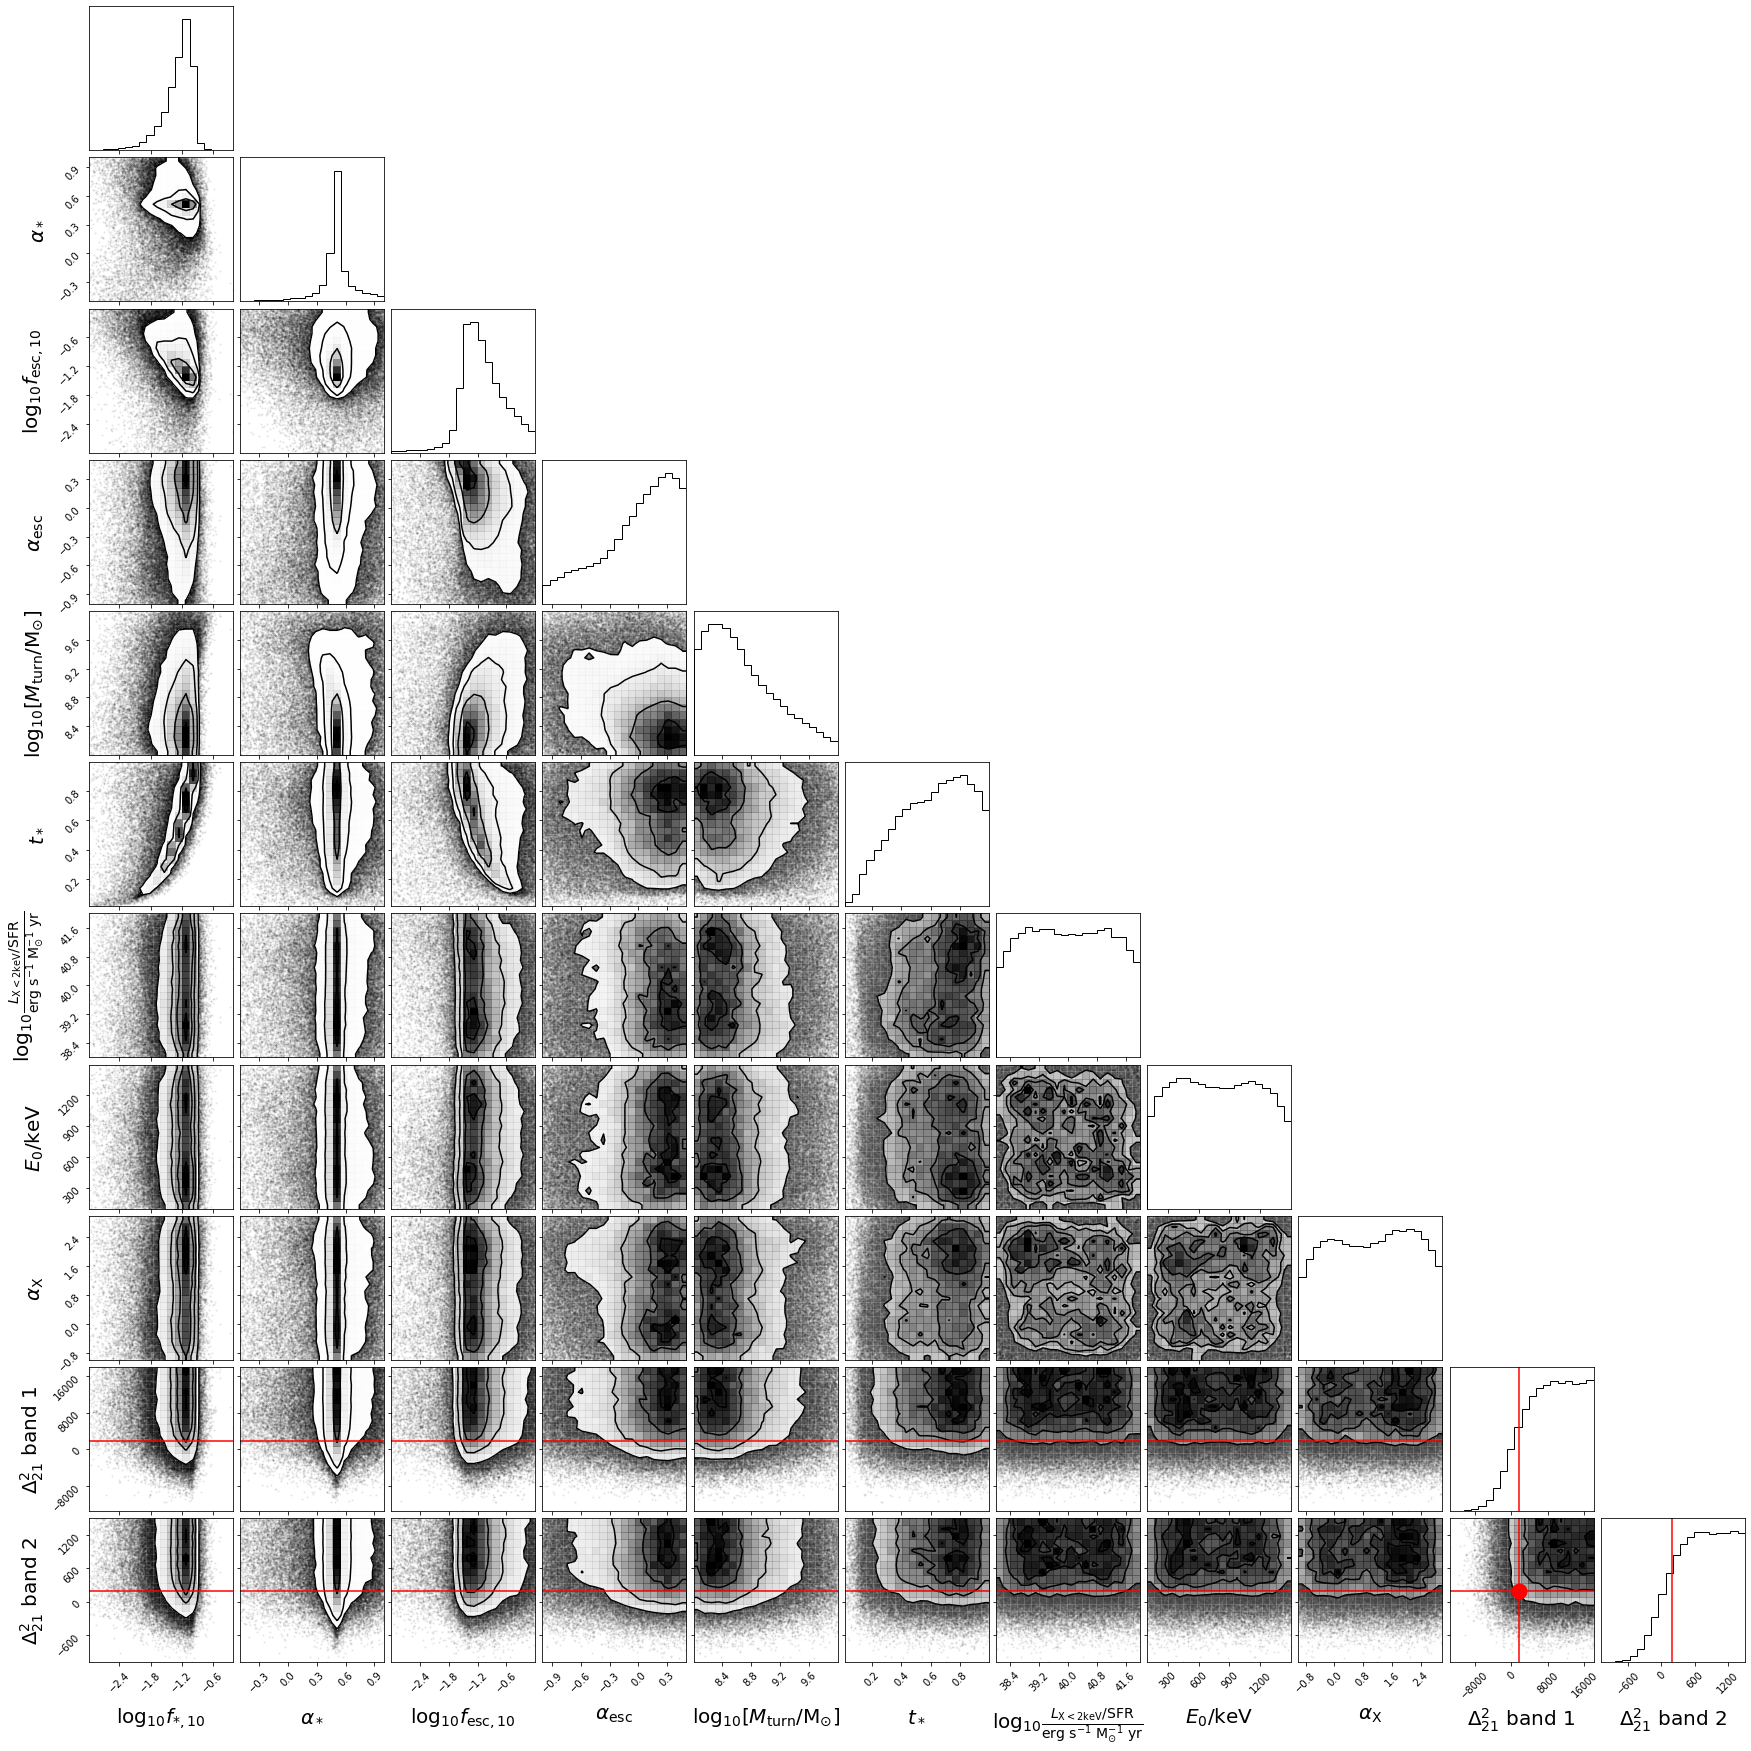

In [17]:
fig = DFM.corner(np.concatenate([thetas, Del2_noisy], axis=1), 
                 labels=list(lbl_params) + [r'$\Delta_{21}^2$ band 1', r'$\Delta_{21}^2$ band 2'],
                 label_kwargs={'fontsize': 20})
DFM.overplot_points(fig, [[None for _ in lbl_params] + [1700, 200]], color='r', markersize=30)
DFM.overplot_lines(fig, [None for _ in lbl_params] + [1700, 200], color='r')

In [18]:
f = h5py.File(os.path.join(dat_dir, '21cmlfi.hdf5'), 'a')
f.create_dataset('Del2_21_noise', data=Del2_noisy)
f.close()